# Lesson09：Final Project - 我的 AI 夥伴

教學主題：專案整合。

核心目標：自由組合已學技能，完成一個有始有終的任務。

前 20 分鐘 (腦力激盪)：

提供幾個專案點子：A. 迎賓機器狗；B. 自動巡邏員；C. 遠端勘探員。

後 100 分鐘 (專案工作坊)：學員自由組隊，選擇一個專案進行開發。分組開發，講師支援，專案
及簡報中必須含一項安全設計及一項倫理考量。

## 9.1 Import and initialize the client for G1

In [ ]:
import time
import sys
from unitree_sdk2py.core.channel import ChannelSubscriber, ChannelFactoryInitialize
from unitree_sdk2py.go2.sport.sport_client import SportClient
from unitree_sdk2py.g1.loco.g1_loco_client import LocoClient

ChannelFactoryInitialize(0, "ens37")
sport_client = LocoClient()  
sport_client.SetTimeout(10.0)
sport_client.Init()

## 9.2 More actions with arm

### Actions

In [ ]:
from unitree_sdk2py.g1.arm.g1_arm_action_client import G1ArmActionClient
armAction_client = G1ArmActionClient()  
armAction_client.SetTimeout(10.0)
armAction_client.Init()

In [ ]:
# Define action map
action_map = {
    "two-hand kiss": 11,
    "left kiss": 12,
    "right kiss": 13,
    "hands up": 15,
    "clap": 17,
    "high five": 18,
    "hug": 19,
    "heart": 20,
    "right heart": 21,
    "reject": 22,
    "right hand up": 23,
    "x-ray": 24,
    "face wave": 25,
    "high wave": 26,
    "shake hand": 27,
}

In [ ]:
armAction_client.ExecuteAction(action_map.get("two-hand kiss"))
# savection example
armAction_client.ExecuteAction(11)

## 9.3 Design your own robot policy

安全设计方面的提示：

* 参考Lesson07学习的机器狗雷达检测距离。

伦理考量方面提示：

* 参考Lesson04学习的机器狗动作。
* 参考Lesson08-09学习的人形机器人动作。

## 9.4 Using YOLO for object detection

In [24]:
# 'pip install ultralytics' to install ultralytics package first 
# 'pip install ultralytics -i https://pypi.tuna.tsinghua.edu.cn/simple' to install ultralytics package first 
from ultralytics import YOLO

# Load a pretrained YOLOv12n model
model = YOLO("yolo12x.pt")  # 可选模型：yolo12n.pt、yolo12s.pt、yolo12m.pt、yolo12l.pt、yolo12x.pt，效果依次越来越好

# Perform object detection on an image
results = model("cat_dog.png")

# Display the results
results[0].show()


image 1/1 d:\OneDrive - HKUST (Guangzhou)\\2026114-G1\tutorial_ws\cat_dog.png: 448x640 1 cat, 2 dogs, 1 bed, 37.6ms
Speed: 1.5ms preprocess, 37.6ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)



image 1/1 d:\OneDrive - HKUST (Guangzhou)\\2026114-G1\tutorial_ws\cat_dog.png: 448x640 1 cat, 2 dogs, 1 bed, 37.0ms
Speed: 1.3ms preprocess, 37.0ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)


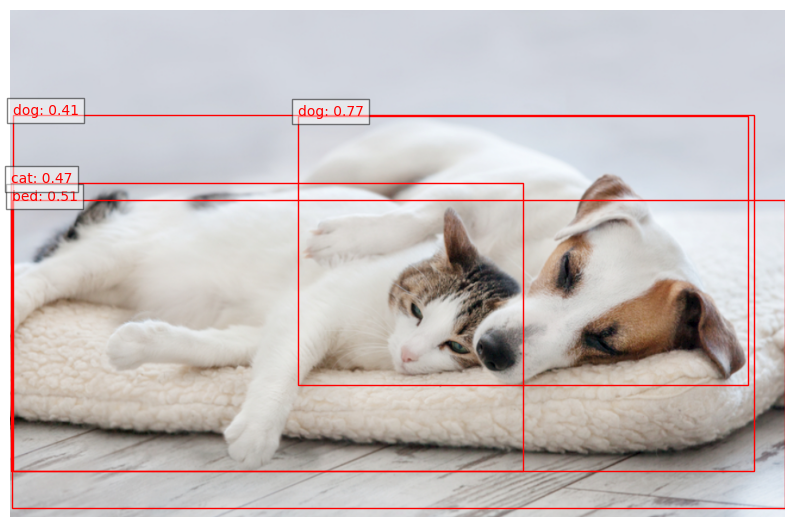

In [25]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
image_path = "cat_dog.png"
save_path = "cat_dog_output.jpg"
model_name = "yolo12x.pt"  # 可选模型：yolo12n.pt、yolo12s.pt、yolo12m.pt、yolo12l.pt、yolo12x.pt，效果依次越来越好

# 加载预训练的YOLO模型
model = YOLO(model_name)

# 执行图像上的对象检测
results = model(image_path)

# 读取原始图像
image = Image.open(image_path)
image_np = np.array(image)

# 可视化结果
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(image_np)

# 遍历每个检测结果
for i, det in enumerate(results[0].boxes.xyxy):
    # 获取边界框坐标
    xmin, ymin, xmax, ymax = det.tolist()
    # 在图像上绘制矩形
    rect = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    # 显示类别和置信度分数（如果需要）
    score = results[0].boxes.conf[i].item()
    label = results[0].names[results[0].boxes.cls[i].item()]
    ax.text(xmin, ymin, f'{label}: {score:.2f}', color='red', bbox=dict(facecolor='white', alpha=0.5))

plt.axis('off')
plt.show()

# 如果你想保存图片
fig.savefig(save_path, bbox_inches='tight', pad_inches=0)